<a href="https://colab.research.google.com/github/SaiKarthik9063/parallelized-inflation-rate-prediction-using-deep-learning/blob/main/EA_I_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
# Upload the file
uploaded = files.upload()
# Get the first uploaded file
file_name = list(uploaded.keys())[0]
# Read the Excel file
df = pd.read_excel(file_name)
infEA = df.iloc[28:280, 2].astype(float).tolist()


Saving EA_Infl.xlsx to EA_Infl (1).xlsx


In [ ]:
import pandas as pd
from google.colab import files
# Upload the file
uploaded = files.upload()
# Get the first uploaded file
file_name = list(uploaded.keys())[0]
# Read the Excel file
df = pd.read_excel(file_name)
intrateEA = df.iloc[10:262, 2].astype(float).tolist()

Saving EA_interest_rate.xlsx to EA_interest_rate (1).xlsx


In [ ]:
import pandas as pd
from google.colab import files
# Upload the file
uploaded = files.upload()
# Get the first uploaded file
file_name = list(uploaded.keys())[0]
# Read the Excel file
df = pd.read_excel(file_name)
M2EA = df.iloc[232:484, 4].astype(float).tolist()


Saving EA_M2.xlsx to EA_M2 (1).xlsx


In [ ]:
import pandas as pd
from google.colab import files
# Upload the file
uploaded = files.upload()
# Get the first uploaded file
file_name = list(uploaded.keys())[0]
# Read the Excel file
df = pd.read_excel(file_name)
OutputGapEA = df.iloc[100:352, 4].astype(float).tolist()

Saving EA_M2.xlsx to EA_M2 (2).xlsx


In [ ]:
import pandas as pd
from google.colab import files
# Upload the file
uploaded = files.upload()
# Get the first uploaded file
file_name = list(uploaded.keys())[0]
# Read the Excel file
df = pd.read_excel(file_name)
urateEA = df.iloc[13:265, 2].astype(float).tolist()

Saving EA_u_rate.xlsx to EA_u_rate.xlsx


In [ ]:
import pandas as pd
from google.colab import files
# Upload the file
uploaded = files.upload()
# Get the first uploaded file
file_name = list(uploaded.keys())[0]
# Read the Excel file
df = pd.read_excel(file_name)
REREA = df.iloc[70:322, 2].astype(float).tolist()

Saving EA_RER.xlsx to EA_RER.xlsx


In [ ]:
print(len(infEA))
print(len(intrateEA))
print(len(M2EA))
print(len(OutputGapEA))
print(len(urateEA))
print(len(REREA))

252
252
252
252
252
252


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Define the number of months
nmonths = 252
start_date = pd.to_datetime('1999-01-01')

mdate = pd.date_range(start=start_date, periods=nmonths, freq='MS')

# Replace missing values with 0
infEA = [0 if pd.isna(value) else value for value in infEA]
intrateEA = [0 if pd.isna(value) else value for value in intrateEA]
M2EA = [0 if pd.isna(value) else value for value in M2EA]
OutputGapEA = [0 if pd.isna(value) else value for value in OutputGapEA]
urateEA = [0 if pd.isna(value) else value for value in urateEA]
REREA = [0 if pd.isna(value) else value for value in REREA]

# Create the DataFrame
dataEA = pd.DataFrame({
    'mdate': mdate,
    'infEA': infEA,
    'intrateEA': intrateEA,
    'M2EA': M2EA,
    'OutputGapEA': OutputGapEA,
    'urateEA': urateEA,
    'REREA': REREA,
})
dataEA.to_csv('\content\downloads\dataEA.csv', index=False)

'''new_row = {'mdate': '2020-01-01', 'infEA': 0.023456, 'intrateEA': 0.012345, 'M2EA': 0.034567, 'OutputGapEA': 0.045678, 'urateEA': 0.056789, 'REREA': 0.067890, 'realWEA': 0.078901}
dataEA = dataEA.append(new_row, ignore_index=True)'''
dataEA['mdate'] = pd.to_datetime(dataEA['mdate'])

# Display the DataFrame
print(dataEA)

         mdate     infEA  intrateEA      M2EA  OutputGapEA  urateEA     REREA
0   1999-01-01  0.007343      0.045 -0.024007     0.005922   0.1007  0.058503
1   1999-02-01  0.007067      0.045 -0.011594     0.006323   0.0999  0.055158
2   1999-03-01  0.008832      0.045 -0.012022     0.005597   0.0993  0.051843
3   1999-04-01  0.010715      0.035 -0.011421     0.001756   0.0992  0.036472
4   1999-05-01  0.009210      0.035 -0.009605     0.000203   0.0987  0.000442
..         ...       ...        ...       ...          ...      ...       ...
247 2019-08-01  0.010885      0.000 -0.008533     0.003686   0.0751 -0.025655
248 2019-09-01  0.008840      0.000 -0.007006     0.001361   0.0750 -0.043076
249 2019-10-01  0.007765      0.000 -0.006933    -0.007378   0.0743 -0.033207
250 2019-11-01  0.008915      0.000 -0.005267    -0.002051   0.0739 -0.033184
251 2019-12-01  0.013172      0.000 -0.001343     0.004581   0.0736 -0.033505

[252 rows x 7 columns]


In [ ]:
import pandas as pd #data manipulation
import numpy as np #data manipulation
from numpy import array
from numpy import hstack
from numpy.random import seed
seed(123)
import tensorflow as tf
import datetime
from datetime import datetime, timedelta
from sklearn import preprocessing #preprocessing
import math as math

import keras as keras #keras package for neural networks
from keras.models import Sequential
from keras.layers import Dense #dense layers
from keras.layers import LSTM #LSTM layers
from keras.layers import Dropout #Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import plot_model #plot network's structure
import matplotlib.pyplot as plt #plots
import time
from collections import Counter
import os
os.chdir('..')
import csv #save output
import math

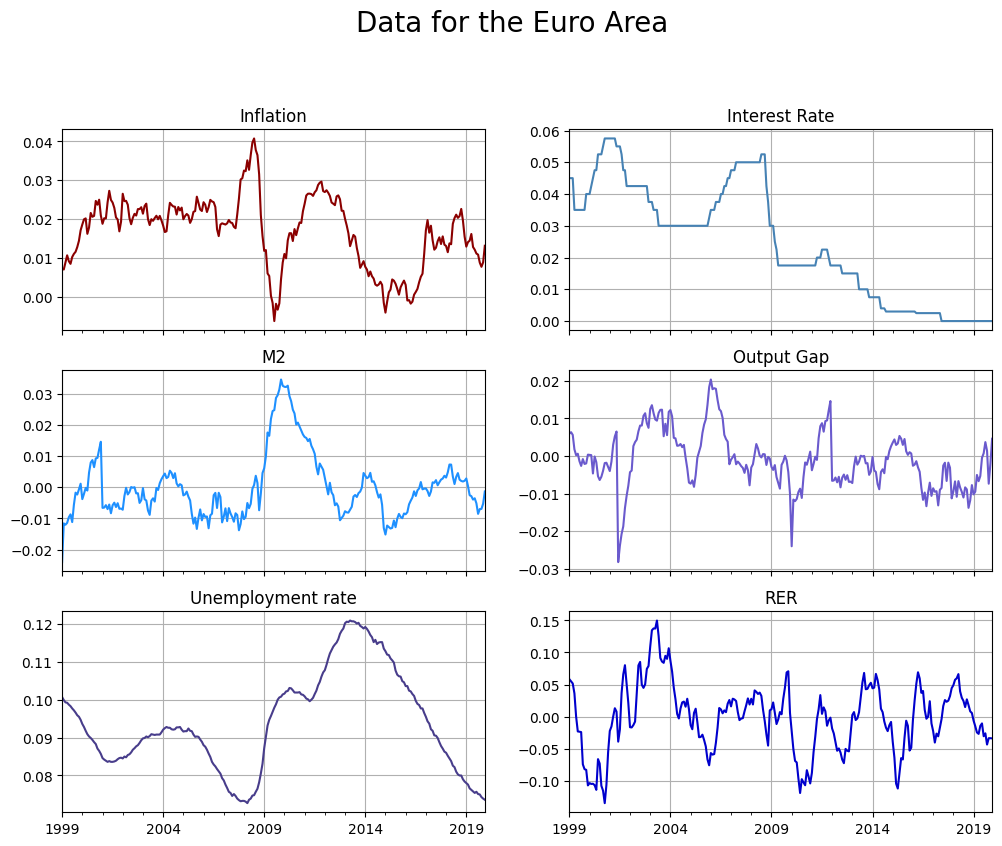

In [ ]:
dataEA.plot(x='mdate',
            y=['infEA', 'intrateEA', 'M2EA', 'OutputGapEA', 'urateEA', 'REREA', ],
            kind='line',
            subplots=True,
            grid=True,
            figsize=(12, 12),
            title=['Inflation', 'Interest Rate', 'M2', 'Output Gap', 'Unemployment rate', 'RER', ],
            layout=(4, 2),
            sharex=True,
            sharey=False,
            legend=False,
            style=['darkred', 'steelblue', 'dodgerblue', 'slateblue', 'darkslateblue', 'mediumblue', 'midnightblue'])

[ax.set_xlabel('') for ax in plt.gcf().axes]
plt.suptitle('Data for the Euro Area', fontsize=20)
plt.show()



In [ ]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        #find end of pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1

        #check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break

        #gather input and output
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

In [ ]:
start_date = '1995-01-01'
end_date = '2015-01-01'
selected_columns = ['infEA']  # Specify the columns you want to display
in_inf=array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])

selected_columns = ['intrateEA']  # Specify the columns you want to display
in_int=array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])

selected_columns = ['M2EA']  # Specify the columns you want to display
in_M2=array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])

selected_columns = ['OutputGapEA']  # Specify the columns you want to display
in_gdp=array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])

selected_columns = ['urateEA']  # Specify the columns you want to display
in_u=array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])

selected_columns = ['REREA']  # Specify the columns you want to display
in_rer=array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])







In [ ]:

start_date = '2015-01-01'
end_date = '2019-01-01'
selected_columns = ['infEA']
valin_inf = array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])
selected_columns = ['intrateEA']
valin_int = array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])
selected_columns = ['M2EA']
valin_M2  = array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])
selected_columns = ['OutputGapEA']
valin_gdp = array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])
selected_columns = ['urateEA']
valin_u   = array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])
selected_columns = ['REREA']
valin_rer = array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])


In [ ]:
start_date = '1995-01-01'
end_date = '2015-01-01'
selected_columns = ['infEA']
out_inf = array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns] )

In [ ]:
start_date = '2015-01-01'
end_date = '2019-01-01'
selected_columns = ['infEA']
valout_inf=array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns] )

In [ ]:
# Reshape the input and output arrays
in_inf = in_inf.reshape((len(in_inf), 1))
in_int = in_int.reshape((len(in_int), 1))
in_M2 = in_M2.reshape((len(in_M2), 1))
in_gdp = in_gdp.reshape((len(in_gdp), 1))
in_u = in_u.reshape((len(in_u), 1))
in_rer = in_rer.reshape((len(in_rer), 1))

valin_inf = valin_inf.reshape((len(valin_inf), 1))
valin_int = valin_int.reshape((len(valin_int), 1))
valin_M2 = valin_M2.reshape((len(valin_M2), 1))
valin_gdp = valin_gdp.reshape((len(valin_gdp), 1))
valin_u = valin_u.reshape((len(valin_u), 1))
valin_rer = valin_rer.reshape((len(valin_rer), 1))

out_inf = out_inf.reshape((len(out_inf), 1))
valout_inf = valout_inf.reshape((len(valout_inf), 1))

# Stack columns horizontally
dataset = hstack((in_inf, in_int, in_M2, in_gdp, in_u, in_rer,  out_inf))
valset = hstack((valin_inf, valin_int, valin_M2, valin_gdp, valin_u, valin_rer, valout_inf))

# Timesteps
n_steps_in, n_steps_out = 12, 12  # use 12 observations to predict next 12

X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print(X.shape, y.shape)  # shape of input and output = (227, 12, 7) and (227, 12)
valX, valy = split_sequences(valset, n_steps_in, n_steps_out)
print(valX.shape, valy.shape)  # shape of validation input and output = (48, 12, 7) and (48, 12)



(171, 12, 6) (171, 12)
(27, 12, 6) (27, 12)


In [ ]:

start_date = '2018-02-01'
end_date = '2019-01-01'
selected_columns = ['infEA']
x_inf = array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])
selected_columns = ['intrateEA']
x_int= array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])
selected_columns = ['M2EA']
x_M2  = array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])
selected_columns = ['OutputGapEA']
x_gdp = array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])
selected_columns = ['urateEA']
x_u   = array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])
selected_columns = ['REREA']
x_rer = array(dataEA.loc[(dataEA['mdate'] >= start_date) & (dataEA['mdate'] <= end_date), selected_columns])



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

<function matplotlib.pyplot.show(close=None, block=None)>

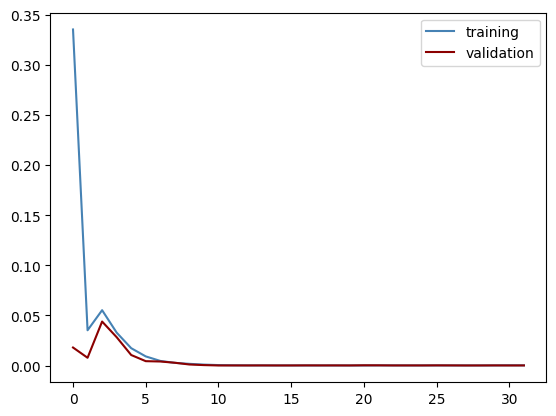

In [ ]:
n_features = X.shape[2]
n_steps_in=12
n_steps_out=12


#model

model = Sequential()
model.add(LSTM(100,
               activation = 'tanh',
               return_sequences = True,
               input_shape = (n_steps_in, n_features)))
model.add(LSTM(100,
               dropout = 0.7,
               recurrent_dropout = 0.7,
              activation = 'tanh'))
model.add(Dense(50, activation = 'tanh'))
model.add(Dense(25, activation = 'tanh'))
model.add(Dense(n_steps_out))

#compile model

model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.04),
              loss = 'mse')

strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
  parallel_model=model


es = EarlyStopping(monitor = 'val_loss',
                  mode = 'min',
                  min_delta = 0.01,
                  patience = 30,
                  verbose = 0)

#fit
fit = parallel_model.fit(X,
          y,
          validation_data = (valX, valy),
          epochs = 500,
          verbose = 0,
          callbacks = [es])

#check for overfitting
plt.plot(fit.history['loss'], label = 'training', color = 'SteelBlue')
plt.plot(fit.history['val_loss'], label = 'validation', color = 'DarkRed')
plt.legend()
plt.show

In [ ]:
x_input = array([x_inf,
                 x_int,
                 x_M2,
                 x_gdp,
                 x_u,
                 x_rer])
x_input = x_input.reshape((1, n_steps_in, n_features))

yhat = model.predict(x_input, verbose = 0)
print(yhat)

[[0.02823034 0.02257252 0.02463776 0.02190336 0.02277115 0.01548443
  0.02310863 0.02494345 0.02491373 0.03029074 0.02897469 0.02089365]]


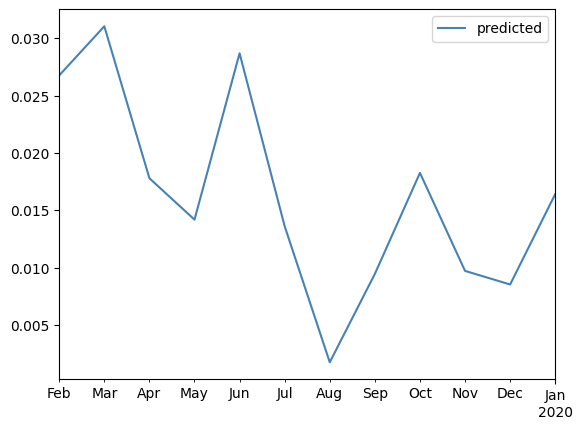

In [ ]:
predicted = pd.DataFrame(yhat.T, index=pd.date_range('02/01/2019',periods=12,freq='M'))
predicted.columns = ['predicted']

predicted.plot(color = 'SteelBlue')
plt.show()

In [ ]:
n = 25
results = []


num_gpus = 1 # Set the number of GPUs you want to use

# Create a MirroredStrategy for multi-GPU training
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:{}".format(i) for i in range(num_gpus)])
num_gpus = 1 # Set the number of GPUs you want to use

# Create a MirroredStrategy for multi-GPU training
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:{}".format(i) for i in range(num_gpus)])

for i in range(0, n):
  with strategy.scope():

    model = Sequential()
    model.add(LSTM(100,
               activation = 'tanh',
               return_sequences = True,
               input_shape = (n_steps_in, n_features)))
    model.add(LSTM(100,
               dropout = 0.7,
               recurrent_dropout = 0.7,
              activation = 'tanh'))
    model.add(Dense(50, activation = 'tanh'))
    model.add(Dense(25, activation = 'tanh'))
    model.add(Dense(n_steps_out))

    model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.04),
              loss = 'mse')

  fit = model.fit(X,
        y,
        validation_data = (valX, valy),
        epochs = 500,
        verbose = 0,
        callbacks = [es])

  yhat = model.predict(x_input, verbose = 0)
  results.append((yhat))

In [ ]:
iter_output = pd.DataFrame(np.concatenate(results)) #build data frame with results
iter_output.columns = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

#mean
mean_forecast = pd.DataFrame([iter_output['m1'].mean(),
                iter_output['m2'].mean(),
                iter_output['m3'].mean(),
                iter_output['m4'].mean(),
                iter_output['m5'].mean(),
                iter_output['m6'].mean(),
                iter_output['m7'].mean(),
                iter_output['m8'].mean(),
                iter_output['m9'].mean(),
                iter_output['m10'].mean(),
                iter_output['m11'].mean(),
                iter_output['m12'].mean()], index=pd.date_range('02/01/2019',periods=12,freq='M')) #mean dataframe
mean_forecast.columns = ['predicted']

#standard deviation
se_forecast = pd.DataFrame([iter_output['m1'].std(),
                iter_output['m2'].std(),
                iter_output['m3'].std(),
                iter_output['m4'].std(),
                iter_output['m5'].std(),
                iter_output['m6'].std(),
                iter_output['m7'].std(),
                iter_output['m8'].std(),
                iter_output['m9'].std(),
                iter_output['m10'].std(),
                iter_output['m11'].std(),
                iter_output['m12'].std()], index=pd.date_range('02/01/2019',periods=12,freq='M')) #se daaframe
se_forecast.columns = ['predicted']

In [ ]:
upper_bound = mean_forecast + 2*se_forecast
lower_bound = mean_forecast - 2*se_forecast

<function matplotlib.pyplot.show(close=None, block=None)>

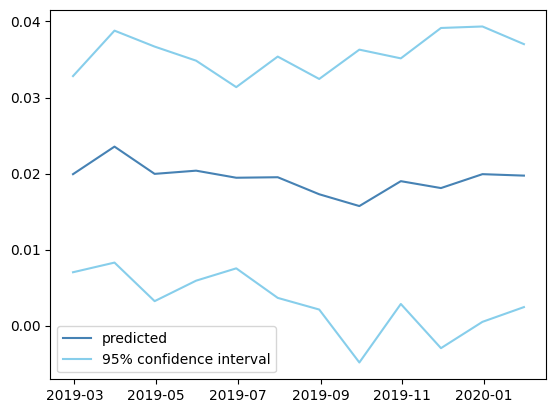

In [ ]:
plt.plot(mean_forecast, label = 'predicted', color = 'SteelBlue')
plt.plot(upper_bound, label = '95% confidence interval', color = 'SkyBlue')
plt.plot(lower_bound, color = 'SkyBlue')
plt.legend()
plt.show

In [ ]:
# Assuming you already have a DataFrame named 'data' containing the data

# Select the desired column
observed = dataEA.iloc[240:, 1:2]  # Assuming the desired column is at index 2

# Assign column name
observed.columns = ['observed']

# Set the index as a date range
observed.index = pd.date_range('02/01/2019', periods=12, freq='M')
observed


,observed
2019-02-28,0.012947
2019-03-31,0.014109
2019-04-30,0.014483
2019-05-31,0.016203
2019-06-30,0.012856
2019-07-31,0.012163
2019-08-31,0.011184
2019-09-30,0.010885
2019-10-31,0.008840
2019-11-30,0.007765


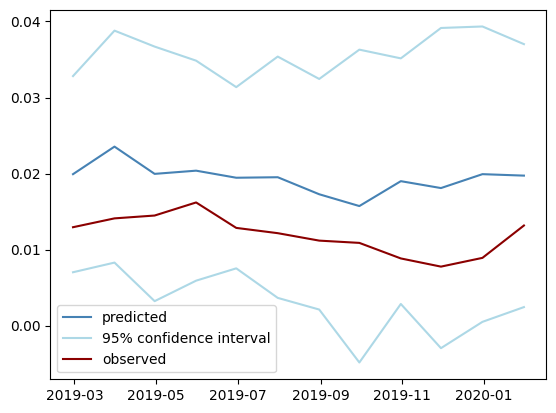

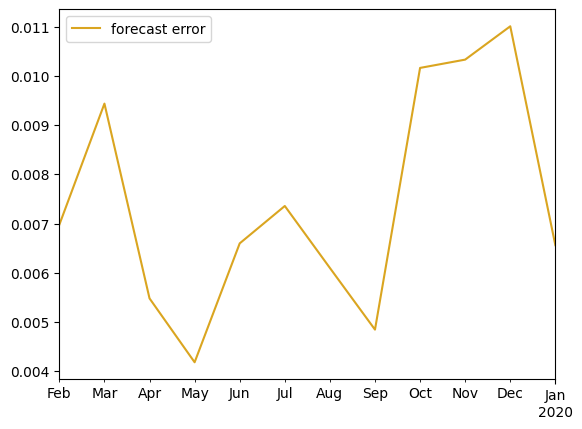

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(forecast error    0.007419
 dtype: float64,
 predicted    0.019379
 dtype: float32)

In [ ]:
import numpy as np

plt.plot(mean_forecast, label='predicted', color='SteelBlue')
plt.plot(upper_bound, label='95% confidence interval', color='lightblue')
plt.plot(lower_bound, color='lightblue')
plt.plot(observed, label='observed', color='DarkRed')  # Specify the column 'infUS' for observed data
plt.legend()
plt.show()

model_error = np.array(mean_forecast) - np.array(observed)  # Subtract 'infUS' column from observed data
model_error = pd.DataFrame(model_error, index=pd.date_range('02/01/2019', periods=len(model_error), freq='M'))
model_error.columns = ['forecast error']

model_error.plot(color='goldenrod')
plt.show()

model_error.mean(), np.mean(mean_forecast)  # Use np.mean to calculate mean of mean_forecast array

